In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Data/Real-Data/Real_Combine.csv")

In [3]:
df=df.dropna()

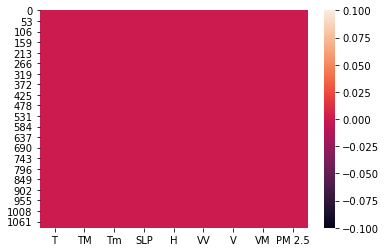

In [4]:
sns.heatmap(df.isnull())

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
#this indicates the default parameter will be setup

In [8]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [9]:
print("Coefficient of determintation R^2 on train set:{}".format(dtree.score(X_train,y_train)))

Coefficient of determintation R^2 on train set:1.0


In [10]:
print("Coefficient of determintation R^2 on test set:{}".format(dtree.score(X_test,y_test)))

Coefficient of determintation R^2 on test set:0.7470512187402772


In [11]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,x,y,cv=5)

In [12]:
score.mean()

0.45431233422381273

# TREE VIZULIZATION

In [13]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [16]:
features=list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [17]:
import os

In [18]:
os.environ["PATH"]=os.environ["PATH"]+";"+os.environ["CONDA_PREFIX"]+r"\Library\bin\graphviz"  

In [20]:


#dot_data = StringIO()  
#export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())



In [21]:
predictions=dtree.predict(X_test)

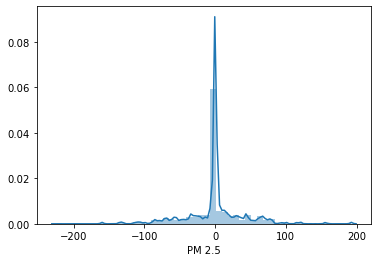

In [22]:
sns.distplot(y_test-predictions)

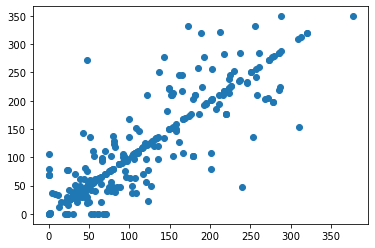

In [23]:
plt.scatter(y_test,predictions)

# HYPERPARAMETER TUNING

In [34]:
params={
 "splitter":["best","random"] ,
 "max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf":[ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features":["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
}

In [35]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [36]:
regressor=GridSearchCV(dtree,param_grid=params,scoring="neg_mean_squared_error",n_jobs=1,cv=10,verbose=3)

In [37]:
 def timer(start_time=None):
        if not start_time:
            start_time=datetime.now()
            return start_time
        elif start_time:
            thour,temp_sec=divmod((datetime.now() - start_time).total_seconds(),3600)
            tmin,tsec=divmod(temp_sec,60)
            print("\n Time Taken %i hours %i minutes and %s seconds:"%(thour,tmin,round(tsec,2)))

In [41]:
from datetime import datetime
start_time=timer(None)
#regressor.fit(x,y)
timer(start_time)


 Time Taken 0 hours 0 minutes and 0.0 seconds:


In [49]:
regressor.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [50]:
regressor.best_score_

-3132.09677598143

In [56]:
predictions=regressor.predict(X_test)

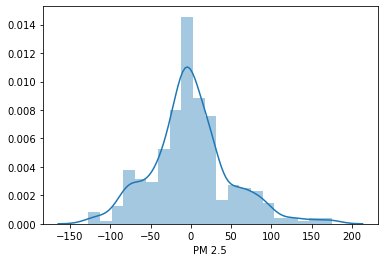

In [57]:
sns.distplot(y_test-predictions)

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 23.095477642276425
MSE: 1722.1444989625675
RMSE: 41.49872888369676


In [48]:
import pickle
# open a file, where you ant to store the data
file = open('Decision_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)